In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import warnings 
warnings.filterwarnings("ignore")


In [2]:
data_path = 'C:/Users/Master/Downloads/netflix_titles.csv/netflix_titles.csv'

df = pd.read_csv(data_path,encoding = 'latin1')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [5]:
### drop unnecessary columns that are mostly unnamed and contain no useful data
columns_to_drop = [col for col in df.columns if 'Unnamed' in col] 
df_cleaned = df.drop(columns = columns_to_drop)

In [6]:
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# fill NaN values for director and cast with no data 

df_cleaned['director'].fillna('No Data',inplace=True)
df_cleaned['cast'].fillna('No Data',inplace=True)

# Fill NaN values for 'country' with the most comman value (mode)
country_mode = df_cleaned['country'].mode()[0]
df_cleaned['country'].fillna(country_mode,inplace=True)

In [8]:
df_cleaned.head(), df_cleaned.isnull().sum()

(  show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water          No Data   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans          No Data   
 4      s5  TV Show           Kota Factory          No Data   
 
                                                 cast        country  \
 0                                            No Data  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
 3                                            No Data  United States   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 2  Septembe

In [9]:
# lets remove the spaces in the 'date added' column and convert it to a date type
df_cleaned['date_added'] = df_cleaned['date_added'].astype(str).str.strip()

df_cleaned["date_added"] = pd.to_datetime(df_cleaned['date_added'])

In [10]:
# extrat month and year

df_cleaned['month_added']=df_cleaned['date_added'].dt.month_name()
df_cleaned['year_added']=df_cleaned['date_added'].dt.year

In [11]:
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021.0
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021.0
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021.0


In [12]:
df_cleaned.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
month_added     10
year_added      10
dtype: int64

In [13]:
# (since the remainingg missing data is not critical ,we can simply
#rop the rows where'date_added','rating',and 'duration' are missing)
df_final = df_cleaned.dropna(subset  = ['date_added','rating','duration'])

df_final.head(),df_final.isnull().sum()


(  show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water          No Data   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans          No Data   
 4      s5  TV Show           Kota Factory          No Data   
 
                                                 cast        country  \
 0                                            No Data  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
 3                                            No Data  United States   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
   date_added  release_year rating   duration  \
 0 2021-09-25          2020  PG-13     90 min   
 1 2021-09-24          2021  TV-MA  2 Seasons   
 2 2021-09-24          2021  TV-MA   1 

# Now lets identify 10 questions and visualize them . lets do this 

# 1. which contries produces the most content

In [14]:
# calculate the humber of content produced by ech country 
country_content_count = df_final['country'].value_counts()
country_content_count

country
United States                             3639
India                                      972
United Kingdom                             418
Japan                                      243
South Korea                                200
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

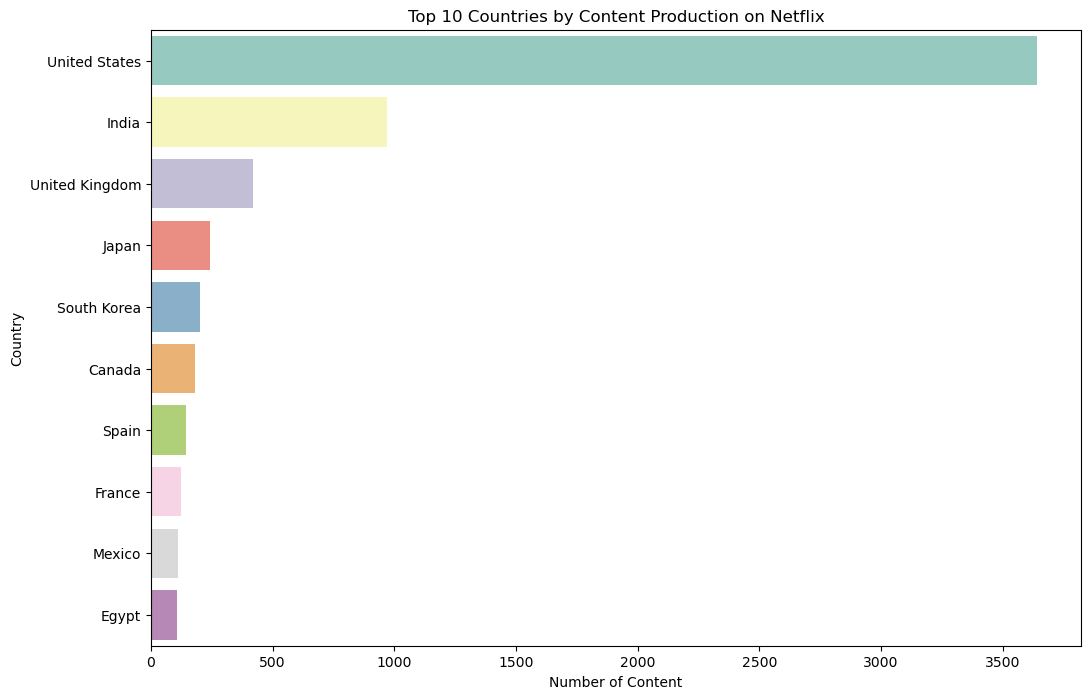

In [15]:
# display the top 10 counties with the most content production

plt.figure(figsize=(12, 8))
sns.barplot(x=country_content_count.head(10).values, 
            y=country_content_count.head(10).index, palette='Set3')
plt.title('Top 10 Countries by Content Production on Netflix')
plt.xlabel('Number of Content')
plt.ylabel('Country')
plt.show()

# 2. How has the trend of content additional changed over the years

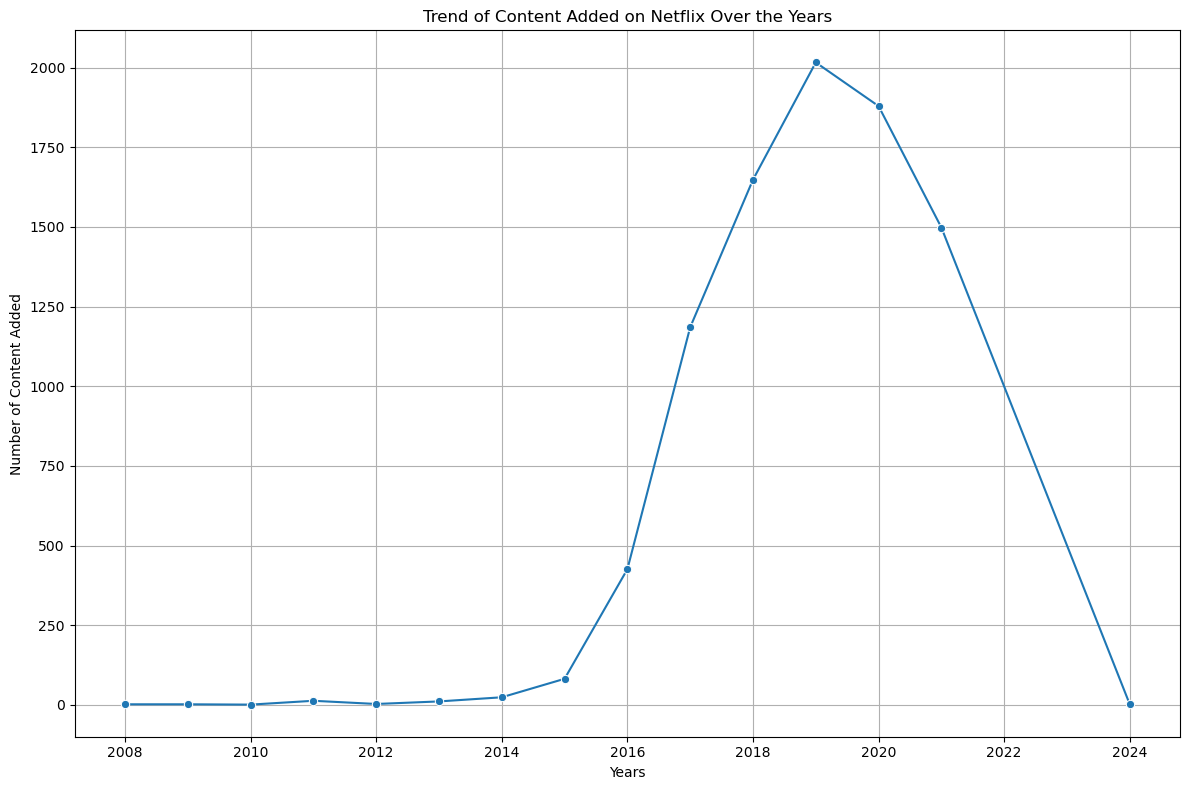

In [16]:
# count the number of content addaed each year
yearly_content_count = df_final['year_added'].value_counts().sort_index()

# plot the trend of content added over the  years
plt.figure(figsize=(12, 8))
sns.lineplot(x=yearly_content_count.index, y=yearly_content_count.values, marker='o')
plt.title('Trend of Content Added on Netflix Over the Years')
plt.xlabel('Years')
plt.ylabel('Number of Content Added')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# I think there is a confusion in 2024 and we need to u se thi data without icluding it 
df_final = df_final[df_final['year_added'] != 2024]

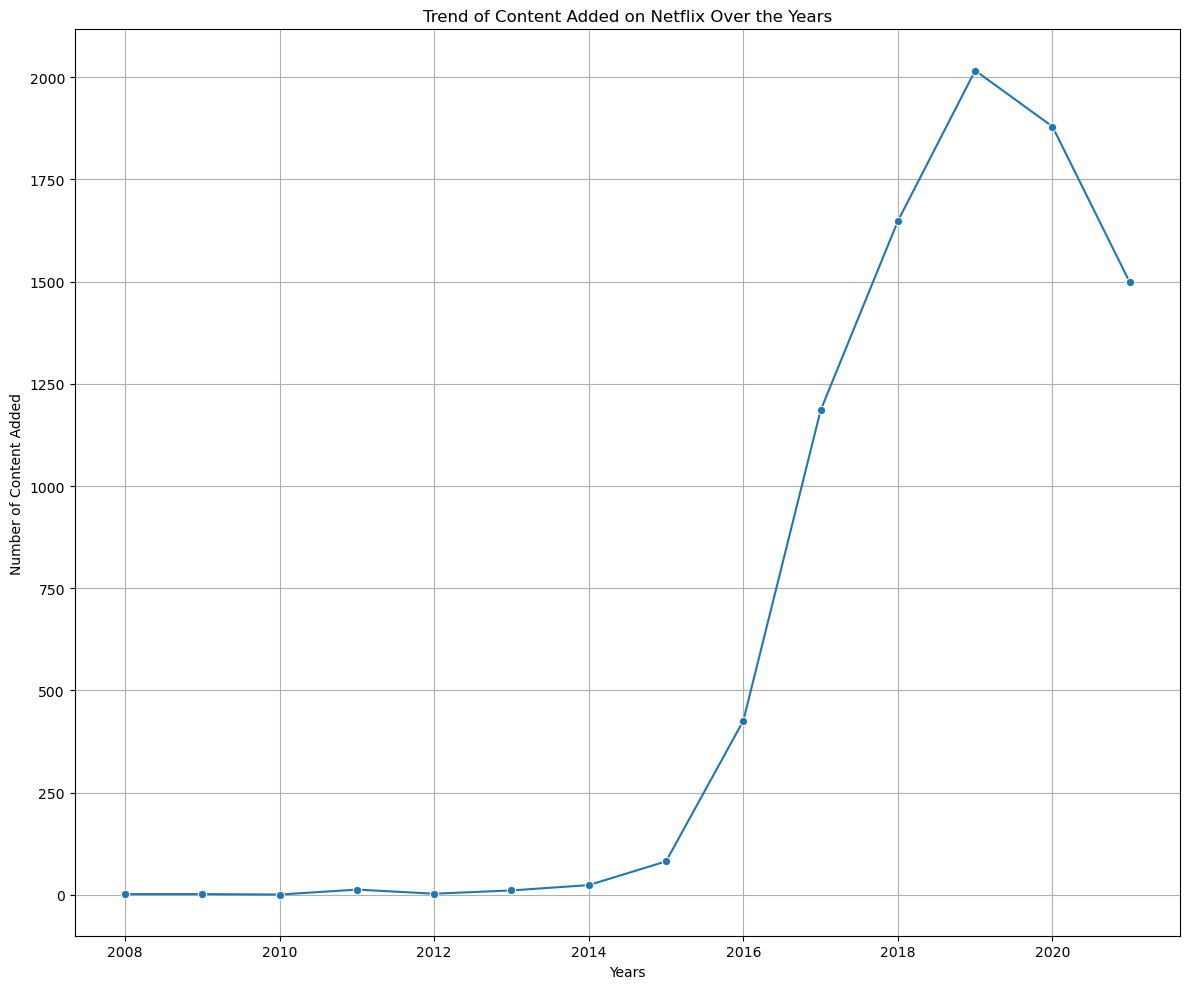

In [18]:
yearly_content_count = df_final['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 10))
sns.lineplot(x=yearly_content_count.index, y=yearly_content_count.values, marker='o')
plt.title('Trend of Content Added on Netflix Over the Years')
plt.xlabel('Years')
plt.ylabel('Number of Content Added')
plt.grid()
plt.tight_layout()
plt.show()

# 3. What is the distribution of content according to different rating categories

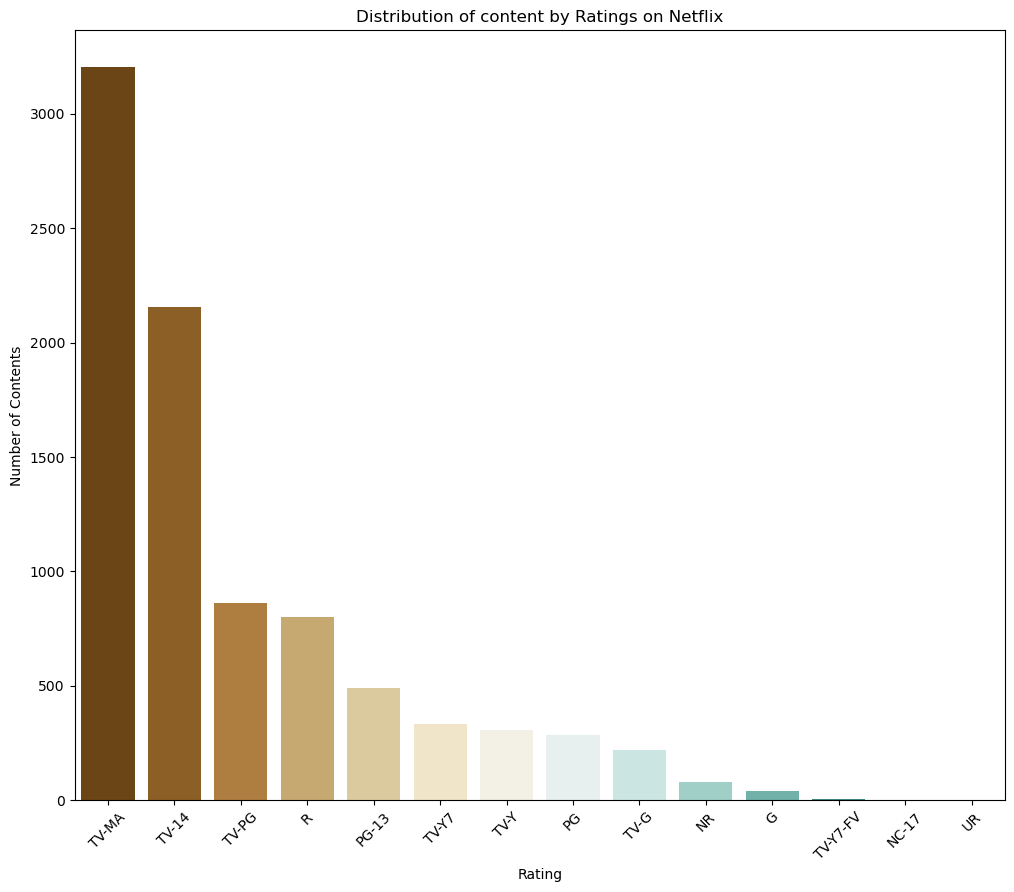

In [19]:
rating_count = df_final['rating'].value_counts()

# plot the distribution of content across different ratings
plt.figure(figsize=(12, 10))
sns.barplot(x=rating_count.index, y=rating_count.values, palette='BrBG')
plt.title('Distribution of content by Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Contents')
plt.xticks(rotation=45)
plt.show()

# 4.What is the month with the most content added

In [20]:
# calculation of month insertion frequencies
monthly_count = df_final['month_added'].value_counts()

# create organized index for month sorting 
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October','November','December']
monthly_count = monthly_count.reindex(months_order)

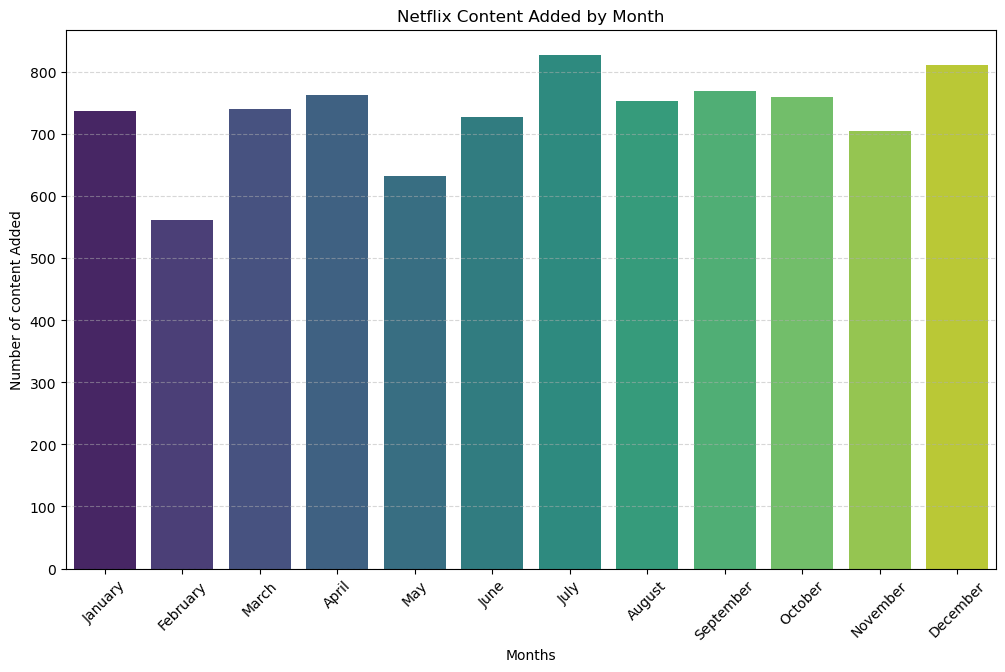

In [21]:
# plotting 
plt.figure(figsize=(12, 7))
sns.barplot(x=monthly_count.index, y=monthly_count.values, palette='viridis')
plt.title('Netflix Content Added by Month')
plt.xlabel('Months')
plt.ylabel('Number of content Added')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 5. Which director has made the most movies and shows 


In [22]:
df_final = df_final[df_final['director'] !='No Data']
top_directors = df_final['director'].value_counts().head(10)
top_directors

director
Rajiv Chilaka              19
RaÃºl Campos, Jan Suter    18
Marcus Raboy               16
Suhas Kadav                16
Jay Karas                  14
Cathy Garcia-Molina        13
Martin Scorsese            12
Jay Chapman                12
Youssef Chahine            12
Steven Spielberg           11
Name: count, dtype: int64

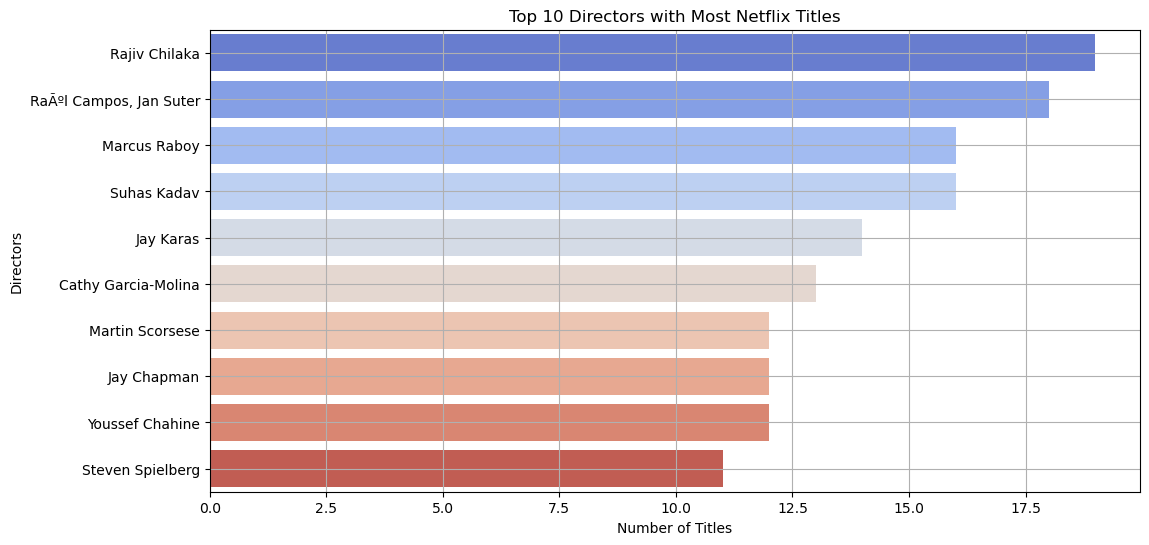

In [23]:
# plotting 
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")
plt.title('Top 10 Directors with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.grid()
plt.show()

# 6. Which spicies are the most popular

In [24]:
df_final.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,2021.0


In [25]:
from collections import Counter

# split the 'listed_in' column into individual genres
genre_list = df_final['listed_in'].str.split(',').explode()
genre_counts = Counter(genre_list)
genre_counts_df = pd.DataFrame(genre_counts.items(), 
                               columns=['Genre', 'Count']).sort_values(by='Count',
                                      ascending=False)                                                       

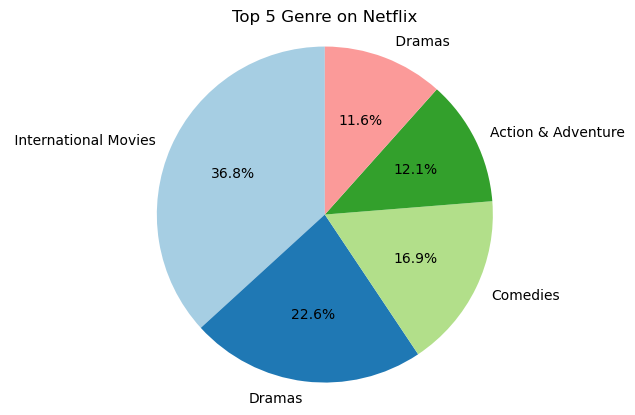

In [26]:
# plotting
top_genres = genre_counts_df.head(5)
fig, ax = plt.subplots()
ax.pie(top_genres['Count'], labels=top_genres['Genre'],autopct='%1.1f%%', startangle=90,
       colors=plt.cm.Paired(range(len(top_genres))))
ax.axis("equal")
plt.title('Top 5 Genre on Netflix')
plt.show()

# 7. What is the distribution of movies duration  

In [27]:
type_content_count = df_final['type'].value_counts()
type_content_count

type
Movie      5939
TV Show     230
Name: count, dtype: int64

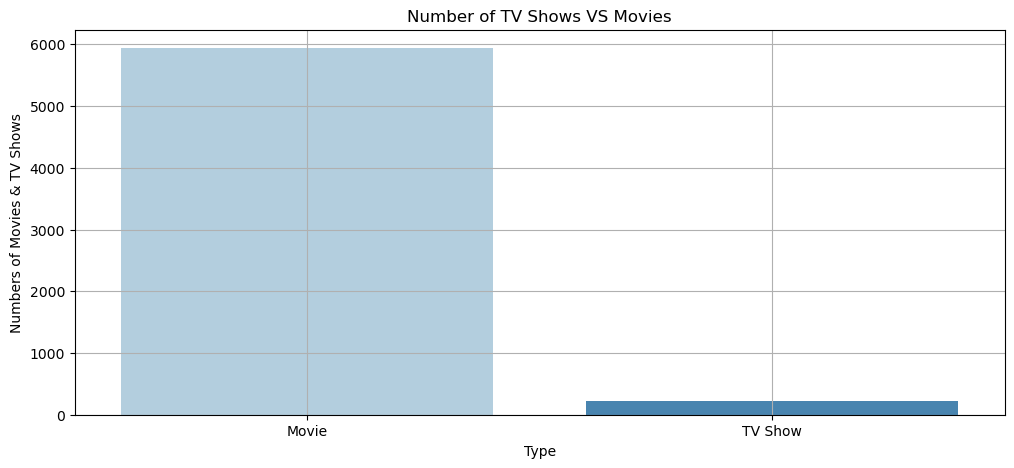

In [28]:
plt.figure(figsize=(12, 5))
sns.barplot(x=type_content_count.index, y=type_content_count.values, palette='Blues')
plt.title('Number of TV Shows VS Movies')
plt.xlabel('Type')
plt.ylabel('Numbers of Movies & TV Shows')
plt.grid()
plt.show()

In [29]:
type_list = df_final['type'].str.split(',').explode()
type_counts= Counter(type_list)
type_counts_df = pd.DataFrame(type_counts.items(), 
                               columns=['type', 'Count']).sort_values(by='Count',
                                      ascending=False) 

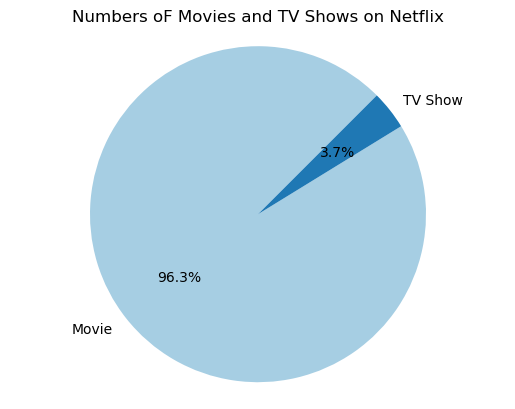

In [30]:
type_content_count = type_counts_df
fig, ax = plt.subplots()
ax.pie(type_content_count['Count'], labels=type_content_count['type'],autopct='%1.1f%%', startangle=45,
       colors=plt.cm.Paired(range(len(type_content_count))))
ax.axis("equal")
plt.title('Numbers oF Movies and TV Shows on Netflix')
plt.show()